# BL40A2020 Wireless Communication Systems

## Final work

## Author: Jesse Peltola

### **Part 2**


First video
Duplexing was discussed in the first video. It is the process of achieving two-way communication over a channel. There is two different duplexing which are half duplex and full duplex in which half duplexing is used for one way communication e.g. radios that uses push-to-talk feature. Full duplexing is two-way communication where transmission and reception happen simultaneously. 
In addition, different duplexing methods are discussed in the video. They are frequency division duplexing, time division duplexing. In FDD uses the full duplex communication link that uses two different radio carrier frequencies for transmitting uplink and downlink. Time Division duplex is a technique by which the uplink and the downlink transmissions are carried over the same frequency by using synchronized time intervals.

Second video
Multiplexing is the process of combining multiple signals and transmitting them over a common channel and it is used for multiple access. Multiplexing methods are FDMA, TDMA, CDMA and WDMA. FDMA uses frequency division multiplexing that provides the frequency spectrum to each users for data transmission. TDMA is used when multiple users are sharing a common frequency band which is allocated with different time slots. CDMA stands for code division multiplexing where the data is modulated by high frequency orthogonal sequences of bits. WDMA stands for wavelength division multiple access and it allows multiple cells to share while same frequencies is separated in space. 

Third video
Wireless channels have complexities that are multiple fading, delay spread, frequency selective fading, inter channel interference. Delay spread means that the first symbol is extended, and causes inter symbol interference. However, it can be avoided by using guard period. 

Last video 

In this video, the topic was about how to handle the data in wireless communcation system. Firstly, the data is modulated with specific modulation depending on physical shared channel. Physical shared channel can be QPSK, 16QAM or 64QAM. After modulating the data is place over the resource elements by adjusting the phase and amplitude of subcarrier to those derived for the data stream. 


### **Part 3 Tasks in Jupyter**

#### Modulating pulses.  Select and plot in time and frequency one example of modulating pulses (signals) that are:

(a) Time-limited (5%)

(b) Band-limited (5%)

In [2]:
import math
import komm
import sympy as sp
from sympy.stats import Normal, density, E, std, cdf
sp.init_printing() 
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.interpolate as interp
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

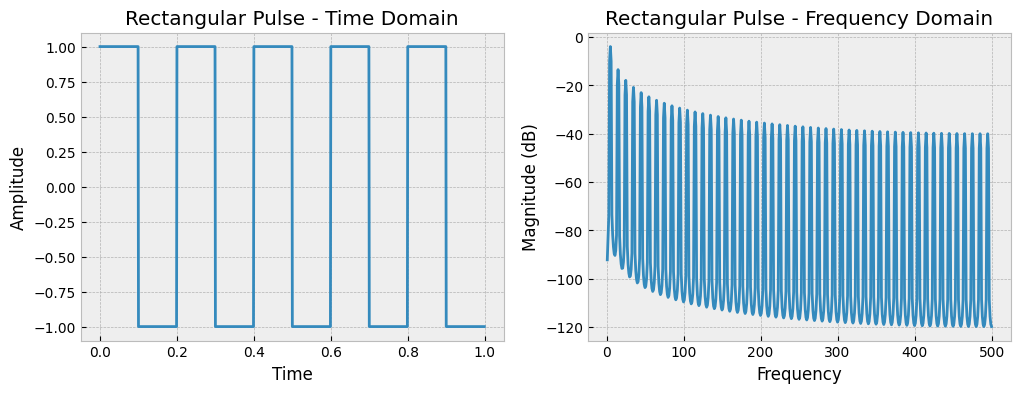

In [55]:
#Time-limited pulse
# Time vector
t = np.linspace(0, 1, 1000, endpoint=False)

# Rectangular Pulse
rect_pulse = signal.square(2 * np.pi * 5 * t)

# Plot Time Domain
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t, rect_pulse)
plt.title('Rectangular Pulse - Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot Frequency Domain
plt.subplot(122)
plt.magnitude_spectrum(rect_pulse, Fs=1000, scale='dB')
plt.title('Rectangular Pulse - Frequency Domain')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')

plt.show()

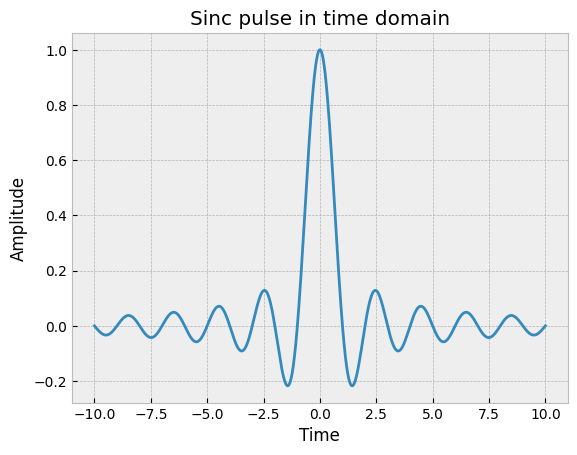

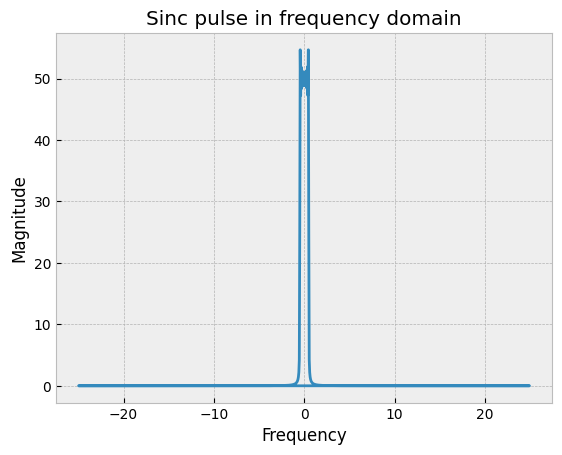

In [4]:
# Band-Limited pulse: Sinc Function
sinc_pulse = np.sinc(10 * t - 5)

# Plot Time Domain
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t, sinc_pulse)
plt.title('Sinc Function - Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot Frequency Domain
plt.subplot(122)
plt.magnitude_spectrum(sinc_pulse, Fs=1000, scale='dB')
plt.title('Sinc Function - Frequency Domain')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')

plt.show()

Compare the performance in terms of symbol error probability of 2-PAM, 4-PAM, 4-QAM, 16-QAM, 64-QAM, 4-PSK, 8-PSK and 16-PSK in an AWGN channel with mean 0 and variance sigma = N_0/2 (per dimension). Considering that they have the same average symbol energy (E_s = 1, which is different from assignment). You can refer to this text to find the equations of the symbol-error probability (remember to use the inequalities as approximations). Remark: Be careful with the requirements in bold (the solution is slightly different from the assignments).

(a) Plot the SNR in dB vs. Symbol error probability for these values. Note that SNR = E_s/N_0. (10%)

(b) Compare these modulations in relation to the trade-off involved between spectral efficiency (bits/s/Hz) and bit error probability. (10%)

(c) What is the capacity of this channel by plotting the curve of the Channel Capacity as a function of SNR. (10%)

(d) With your own words, how you could improve the performance in relation to symbol-error rate and bit-error rate? (error rate and error probability mean the same thing here). Is it possible to know how good is your solution? (10%)

In [53]:

def Q(x):
    return 1/2*scipy.special.erfc(x/np.sqrt(2))

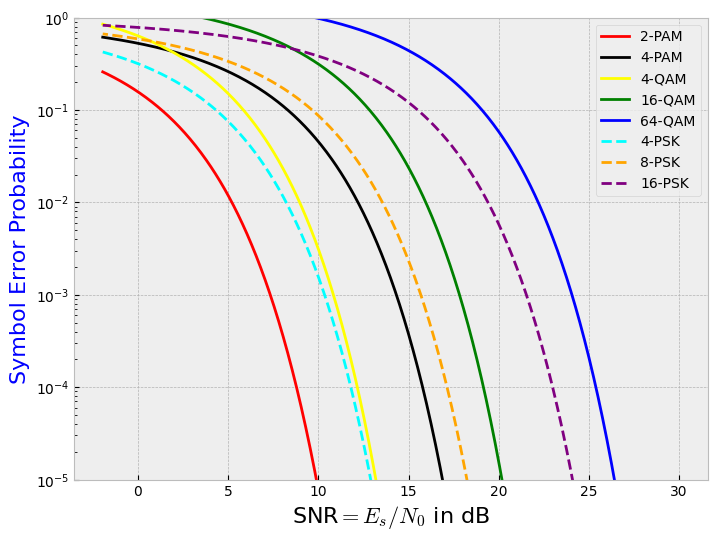

In [6]:
#AWGN noise
noise_power_db = np.arange(-30, 2, 0.05)
noise_power = 10**(noise_power_db/10)
#E_s = 1
snr = 1/noise_power

# CALCULATING ERROR PROBABILITY FOR 2-PAM, 4-PAM, 4-QAM, 16-QAM, 64-QAM, 4-PSK, 8-PSK and 16-PSK 


#2-PAM
order = 2
error_probability_2pam = 2 * Q(np.sqrt( (6/(order ** 2 - 1)) * snr))

#4-PAM
order = 4
error_probability_4pam = 2 * Q(np.sqrt( (6/(order ** 2 - 1)) * snr))


#4-QAM
order = 4
error_probability_4qam = 4 * Q(np.sqrt( (3/(order - 1)) * snr))

#16-QAM
order = 16
error_probability_16qam = 4 * Q(np.sqrt( (3/(order - 1)) * snr))

#64-QAM
order = 64
error_probability_64qam = 4 * Q(np.sqrt( (3/(order - 1)) * snr))

#4-PSK
order = 4
error_probability_4psk = 2 * Q(np.sqrt(2*snr)*np.sin(np.pi/order))

#8-PSK
order = 8
error_probability_8psk = 2 * Q(np.sqrt(2*snr)*np.sin(np.pi/order))

#16-PSK
order = 16
error_probability_16psk = 2 * Q(np.sqrt(2*snr)*np.sin(np.pi/order))

plt.figure(1,figsize=(18,6))
plt.subplot(121)
plt.semilogy(10*np.log10(snr), error_probability_2pam,'red',label='2-PAM');
plt.semilogy(10*np.log10(snr), error_probability_4pam,'black',label='4-PAM');
plt.semilogy(10*np.log10(snr), error_probability_4qam,'yellow',label='4-QAM');
plt.semilogy(10*np.log10(snr), error_probability_16qam,'green',label='16-QAM');
plt.semilogy(10*np.log10(snr), error_probability_64qam,'blue',label='64-QAM');
plt.semilogy(10*np.log10(snr), error_probability_4psk,'cyan', linestyle= "--", label='4-PSK');
plt.semilogy(10*np.log10(snr), error_probability_8psk,'orange',linestyle= "--", label='8-PSK');
plt.semilogy(10*np.log10(snr), error_probability_16psk,'purple',linestyle="--",label='16-PSK');
plt.xlabel('SNR$=E_s/N_0$ in dB',fontsize=16)
plt.ylabel('Symbol Error Probability', color='b',fontsize=16)
plt.ylim(1e-5, 1e-0)
plt.legend();
plt.show();





**(b) Compare these modulations in relation to the trade-off involved between spectral efficiency (bits/s/Hz) and bit error probability. (10%)**


Answer: 

In terms of the trade-off between spectral efficiency and bit error probability, higher-order modulations (such as 16-QAM and 64-QAM) offer higher spectral efficiencies but also higher error probabilities, while lower-order modulations (such as 2-PAM and 4-PAM) offer lower spectral efficiencies but lower error probabilities. The trade-off depends on the specific requirements of the communication system.

As we can see from the plot, 2-PAM offers lower spectral efficiencies compared to other modulations. 

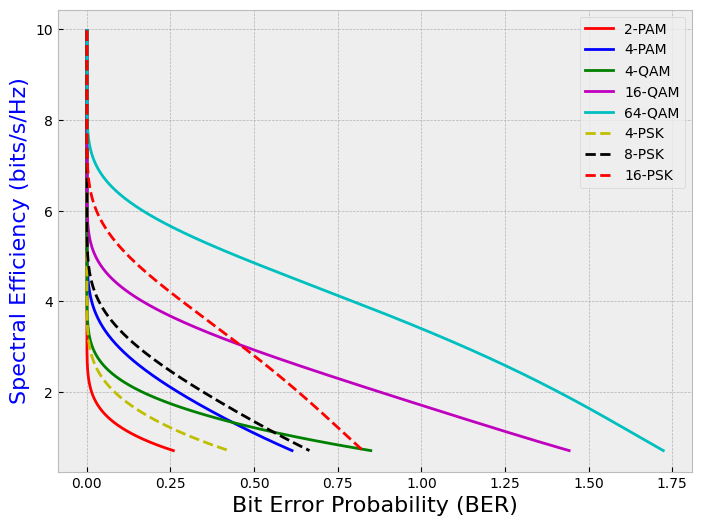

In [52]:
spectral_efficiency_2pam = np.log2(1 + snr)
spectral_efficiency_4pam = np.log2(1 + snr)
spectral_efficiency_4qam = np.log2(1 + snr)
spectral_efficiency_16qam = np.log2(1 + snr)
spectral_efficiency_64qam = np.log2(1 + snr)
spectral_efficiency_4psk = np.log2(1 + snr)
spectral_efficiency_8psk = np.log2(1 + snr)
spectral_efficiency_16psk = np.log2(1 + snr)
# Plot Spectral Efficiency vs. Bit Error Probability
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.plot(error_probability_2pam, spectral_efficiency_2pam, "r", label="2-PAM")
plt.plot(error_probability_4pam, spectral_efficiency_4pam, "b", label="4-PAM")
plt.plot(error_probability_4qam, spectral_efficiency_4qam, "g", label="4-QAM")
plt.plot(error_probability_16qam, spectral_efficiency_16qam, "m", label="16-QAM")
plt.plot(error_probability_64qam, spectral_efficiency_64qam, "c", label="64-QAM")
plt.plot(error_probability_4psk, spectral_efficiency_4psk, "y--", label="4-PSK")
plt.plot(error_probability_8psk, spectral_efficiency_8psk, "k--", label="8-PSK")
plt.plot(error_probability_16psk, spectral_efficiency_16psk, "r--", label="16-PSK")
# plt.plot(spectral_efficiency_2pam, error_probability_2pam, "r", label="2-PAM")
# plt.plot(spectral_efficiency_4pam, error_probability_4pam, "b", label="4-PAM")
# plt.plot(spectral_efficiency_4qam, error_probability_4qam, "g", label="4-QAM")
# plt.plot(spectral_efficiency_16qam, error_probability_16qam, "m", label="16-QAM")
# plt.plot(spectral_efficiency_64qam, error_probability_64qam, "c", label="64-QAM")
# plt.plot(spectral_efficiency_4psk, error_probability_4psk, "y--", label="4-PSK")
# plt.plot(spectral_efficiency_8psk, error_probability_8psk, "k--", label="8-PSK")
# plt.plot(spectral_efficiency_16psk, error_probability_16psk, "r--", label="16-PSK")
plt.xlabel("Bit Error Probability (BER)", fontsize=16)
plt.ylabel("Spectral Efficiency (bits/s/Hz)", color="b", fontsize=16)

plt.legend()
plt.grid(True)

plt.show()

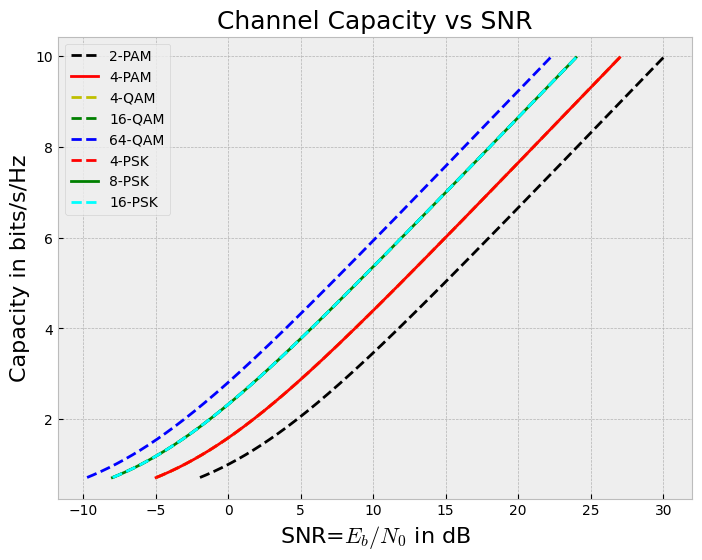

In [40]:

#Based on the requirements E_s = 1, and snr is defined previous
awgn = komm.AWGNChannel()
base_amplitude = 1
#2-PAM
order = 2
modulation = komm.PAModulation(order, base_amplitude=1)

awgn.signal_power = 1
EbperN0_2pam = snr / modulation.bits_per_symbol

#4-PAM 
order = 4
modulation = komm.PAModulation(order, base_amplitude=1)

# awgn.signal_power = modulation.energy_per_symbol
# awgn.snr_4pam = awgn.signal_power / noise_power
# EbperN0_4pam = snr / modulation.energy_per_symbol

awgn.signal_power = 1
EbperN0_4pam = snr / modulation.bits_per_symbol


#4-QAM 
order = 4
modulation = komm.QAModulation(order, base_amplitude)

awgn.signal_power = 1
EbperN0_4qam = snr / modulation.bits_per_symbol

#16-QAM 
order = 16
modulation = komm.QAModulation(order, base_amplitude)

awgn.signal_power = 1
EbperN0_16qam = snr / modulation.bits_per_symbol

#64-QAM 
order = 64
modulation = komm.QAModulation(order, base_amplitude)
awgn.signal_power = 1
EbperN0_64qam = snr / modulation.bits_per_symbol

#4-PSK
order = 4
modulation = komm.PSKModulation(order, base_amplitude)
awgn.signal_power = 1
EbperN0_4psk = snr / modulation.bits_per_symbol

#8-PSK
order = 8
modulation = komm.PSKModulation(order, base_amplitude)
awgn.signal_power = 1

EbperN0_8psk = snr / modulation.bits_per_symbol

#16-PSK
order = 16
modulation = komm.PSKModulation(order, base_amplitude)
awgn.signal_power = 1

EbperN0_8psk = snr / modulation.bits_per_symbol

#Channel capacity is C = log2(1+SNR)
plt.figure(1,figsize=(18,6))
plt.subplot(121)
plt.plot(10 * np.log10(EbperN0_2pam), np.log2(1+snr),'--k',label='2-PAM');

plt.plot(10 * np.log10(EbperN0_4pam), np.log2(1+snr),'r',label='4-PAM');

plt.plot(10 * np.log10(EbperN0_4qam), np.log2(1+snr),'--y',label='4-QAM');

plt.plot(10 * np.log10(EbperN0_16qam), np.log2(1+snr),'--g',label='16-QAM');

plt.plot(10 * np.log10(EbperN0_64qam), np.log2(1+snr),'--b',label='64-QAM');

plt.plot(10 * np.log10(EbperN0_4psk), np.log2(1+snr),'--r',label='4-PSK');

plt.plot(10 * np.log10(EbperN0_8psk), np.log2(1+snr),'g',label='8-PSK');

plt.plot(10 * np.log10(EbperN0_16psk), np.log2(1+snr),'cyan', linestyle='--',label='16-PSK');

plt.title('Channel Capacity vs SNR', fontsize=18)
plt.legend()
plt.xlabel('SNR=$E_b/N_0$ in dB',fontsize=16);
plt.ylabel('Capacity in bits/s/Hz', color='k',fontsize=16);
plt.show()
